In [1]:
from transformers import BertModel, BertTokenizer, AutoModel, AutoTokenizer, AutoModelForTokenClassification
import torch
import pickle
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from matplotlib.patches import Patch
import torch.nn.functional as F

In [2]:
tokenizer = AutoTokenizer.from_pretrained("./checkpoint-final/")
model = AutoModelForTokenClassification.from_pretrained("./checkpoint-final/")
binding = AutoModelForTokenClassification.from_pretrained("./checkpoint-binding/")
model = model.eval()
binding = binding.eval()

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [3]:

def get_out(sent,tokenizer,model):
    encoded = tokenizer.encode_plus(sent, return_tensors="pt")
    with torch.no_grad():
        output = model(**encoded)
    return output

In [4]:
seq = "GSHMSDNEDNFDGDDFDDVEEDEGLDDLENAEEEGQENVEILPSGERPQANQKRITTPYMTKYERARVLGTRALQIAMCAPVMVELEGETDPLLIAMKELKARKIPIIIRRYLPDGSYEDWGVDELIITD"
out0 = get_out(seq,tokenizer,model)
outB = get_out(seq,tokenizer,binding)

In [5]:
len(seq)

130

/tmp/ipykernel_2035295/652288802.py:2: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  plt.plot(F.softmax(torch.squeeze(out0['logits']))[1:-1,1].detach().numpy(), linewidth=3, label="Disordered region")
/tmp/ipykernel_2035295/652288802.py:3: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  plt.plot(F.softmax(torch.squeeze(outB['logits']))[1:-1,1].detach().numpy(), linewidth=3, label="Protein binding",c='Purple')


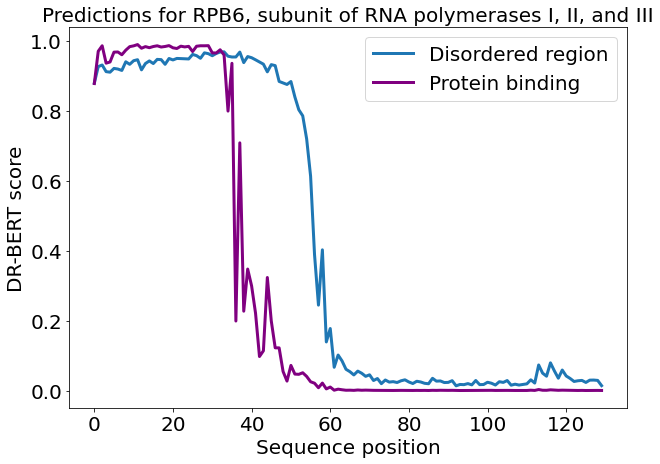

In [6]:
fig, ax = plt.subplots(figsize=(10, 7))
plt.plot(F.softmax(torch.squeeze(out0['logits']))[1:-1,1].detach().numpy(), linewidth=3, label="Disordered region")
plt.plot(F.softmax(torch.squeeze(outB['logits']))[1:-1,1].detach().numpy(), linewidth=3, label="Protein binding",c='Purple')
ax.set_title('Predictions for RPB6, subunit of RNA polymerases I, II, and III',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Sequence position', fontsize=20)
plt.ylabel('DR-BERT score', fontsize=20)
plt.legend(fontsize=20)
plt.savefig('7dth_scores_pb.pdf')
plt.show()

In [12]:
ls = list(F.softmax(torch.squeeze(outB['logits']))[1:-1,1].detach().numpy())
# Open a file and use dump()
with open('wtb.pkl', 'wb') as file:
      
    # A new file will be created
    pickle.dump(ls, file)

/tmp/ipykernel_3112007/499150088.py:1: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  ls = list(F.softmax(torch.squeeze(outB['logits']))[1:-1,1].detach().numpy())


In [11]:
ls = list(torch.squeeze(out0['logits'])[1:-1,1].detach().numpy())
# Open a file and use dump()
with open('wt0.pkl', 'wb') as file:
      
    # A new file will be created
    pickle.dump(ls, file)